# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [7]:
#Type your code here
import pandas as pd # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt # Mengimpor pustaka matplotlib untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN # Mengimpor algoritma KMeans dan DBSCAN untuk clastering
from sklearn.metrics import silhouette_score # Mengimpor silhoutte_score untuk mengevaluasi hasil clustering

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?gid=2020477971&single=true&output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [8]:
# Load data
df = pd.read_csv("bank_transactions_data_edited.csv")

In [9]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [11]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [12]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

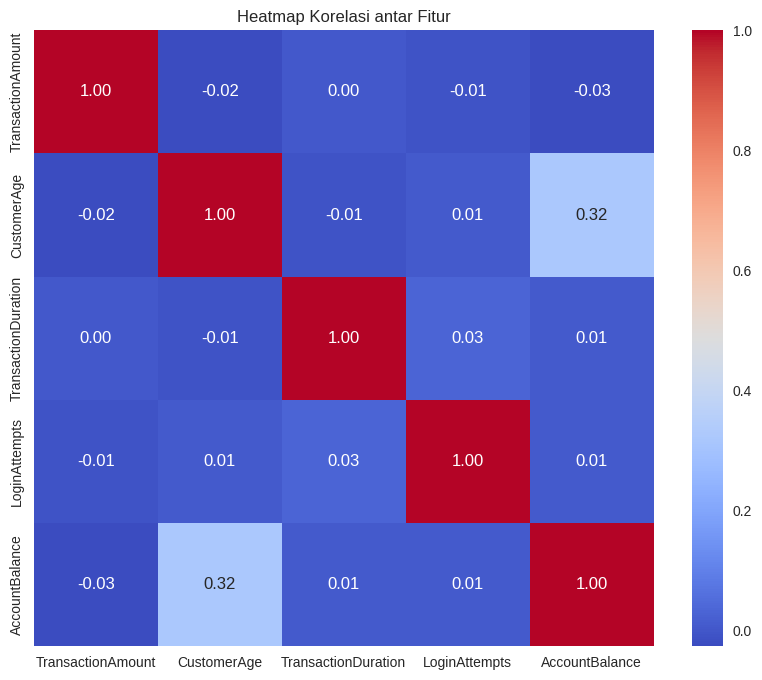

In [13]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
korelasi = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi antar Fitur")
plt.show()

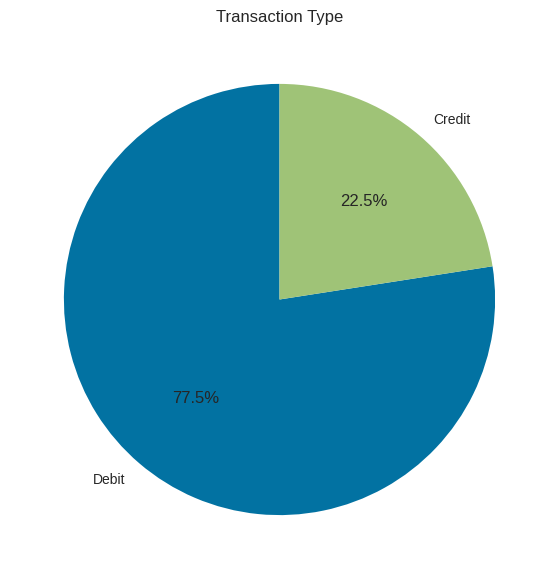

In [14]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
plt.figure(figsize=(7,7))
plt.pie(df['TransactionType'].value_counts(), labels=['Debit', 'Credit'], autopct='%1.1f%%', startangle=90)
plt.title('Transaction Type')
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [16]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [17]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [18]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numeric_df)
# Ubah Kembali ke dataframe
df_scaled_minmax = pd.DataFrame(scaled_data, columns=numeric_df.columns)
# Pastikan kamu menggunakan function head setelah melalukan scaling.
df_scaled_minmax.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,0.007207,0.838710,0.244828,0.0,0.336832
1,0.195940,0.806452,0.451724,0.0,0.918055
2,0.065680,0.016129,0.158621,0.0,0.068637
3,0.096016,0.129032,0.051724,0.0,0.569198
4,0.006874,NaN,0.648276,0.0,0.492591


In [19]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'], axis=1)

In [20]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation', 'Location']
encoders = {} # Initialize the encoders dictionary
for col in categorical_cols:
  df[col] = label_encoder.fit_transform(df[col])
  encoders[col] = label_encoder # Store the fitted encoder
print(df.head())

   TransactionAmount      TransactionDate  TransactionType  Location  Channel  \
0              14.09  2023-04-11 16:29:14                1        36        0   
1             376.24  2023-06-27 16:44:19                1        15        0   
2             126.29  2023-07-10 18:16:08                1        23        2   
3             184.50  2023-05-05 16:32:11                1        33        2   
4              13.45  2023-10-16 17:51:24                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0                   0                 81.0            1.0   
1         68.0                   0                141.0            1.0   
2         19.0                   3                 56.0            1.0   
3         26.0                   3                 25.0            1.0   
4          NaN                   3                198.0            1.0   

   AccountBalance PreviousTransactionDate  
0         5112.21     20

In [21]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [22]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna(axis=1)

In [23]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [26]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionType,Location,Channel,CustomerOccupation
count,920.000000,920.000000,920.000000,920.000000
mean,0.656522,21.532609,1.139130,1.548913
std,0.539476,12.543765,0.848856,1.174539
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,0.000000,0.750000
50%,1.000000,22.000000,1.000000,2.000000
75%,1.000000,32.000000,2.000000,3.000000
max,2.000000,43.000000,3.000000,4.000000


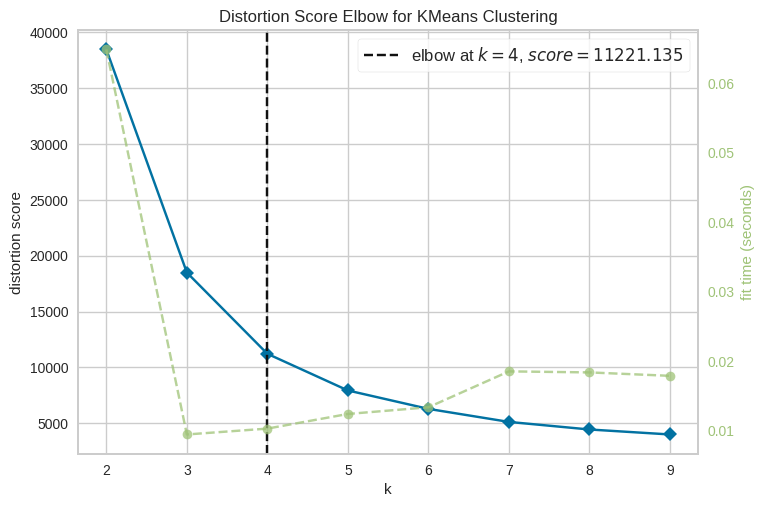

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Drop non-numeric columns before applying KMeans


model = KMeans(random_state=42, n_init=10) # Added random_state and n_init
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(df)
visualizer.show()

In [28]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=9, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

Jalankan cell code ini untuk menyimpan model kamu.

In [29]:
# Menyimpan model menggunakan joblib
import joblib
joblib.dump(model, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(df, kmeans.labels_)
print(f"Silhouette Score: {score}")

Silhouette Score: 0.5407980321044973


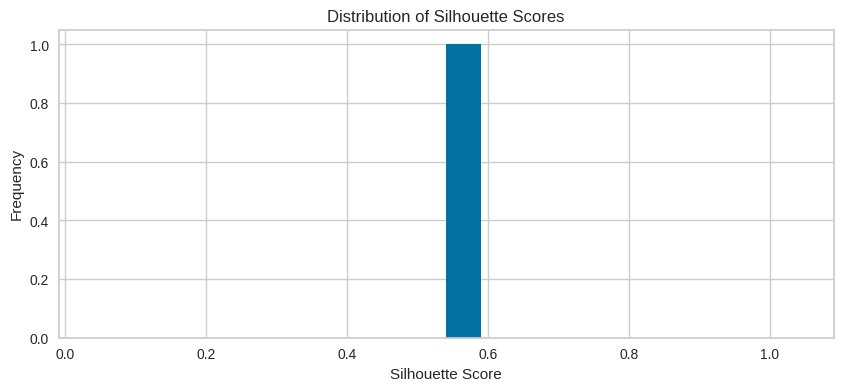

In [31]:
# Membuat visualisasi hasil clustering
sample_values = silhouette_score(df, kmeans.labels_)

plt.figure(figsize=(10, 4))
plt.hist(sample_values, bins=20)
plt.xlabel('Silhouette Score')
plt.ylabel('Frequency')
plt.title('Distribution of Silhouette Scores')
plt.show()

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [34]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.
df.groupby('Cluster').agg(['mean', 'min', 'max', 'median'])



TransactionType                  Location                  Channel  \
                   mean min max median       mean min max median      mean   
Cluster                                                                      
0              0.679612   0   2    1.0   2.116505   0   4    2.0  1.135922   
1              0.651163   0   2    1.0  21.430233  20  23   21.0  1.197674   
2              0.658333   0   2    1.0  40.366667  38  43   40.0  1.125000   
3              0.673077   0   2    1.0  12.057692  10  14   12.0  1.134615   
4              0.644444   0   2    1.0  30.455556  29  32   30.0  1.122222   
5              0.696078   0   2    1.0   6.990196   5   9    7.0  1.098039   
6              0.603774   0   2    1.0  34.952830  33  37   35.0  1.122642   
7              0.663462   0   2    1.0  16.971154  15  19   17.0  1.221154   
8              0.638095   0   2    1.0  25.971429  24  28   26.0  1.104762   

                       CustomerOccupation                 
        min max median               mean min max median  
Cluster                                                   
0         0   3    1.0           1.495146   0   4    1.0  
1         0   3    1.0           1.453488   0   4    1.0  
2         0   3    1.0           1.575000   0   4    2.0  
3         0   3    1.0           1.500000   0   4    1.0  
4         0   3    1.0           1.633333   0   4    2.0  
5         0   3    1.0           1.588235   0   4    2.0  
6         0   3    1.0           1.518868   0   4    1.0  
7         0   3    1.0           1.480769   0   4    1.0  
8         0   3    1.0           1.685714   0   4    2.0

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Dominan transaksi Debit, Kota daerah sangat kecil/pelosok, dan dominan di kanal ATM, Pekerjaan profesional menengah)**:
  - **Rata-rata (mean) TransactionType<Fitur>: 0.68**
  - **Rata-rata Location<Fitur>: 2.12**
  - **Rata-rata Channel<Fitur>: 1.14**
  - **Rata-rata CustomerOccupation<Fitur>: 1.50**  
  - **Analisis:** Cluster ini dominan transaksi debit di kota besar, sering dilakukan melalui ATM. Pekerjaan pelanggan cenderung profesional menengah. Cluster ini bisa menggambarkan kelas pekerja profesional di kota kecil yang aktif menggunakan ATM.

  2. **Cluster 1: (Dominan transaksi Debit, Kota menengah, kombinasi ATM&Branch,Pekerjaan profesional menengah)**:
  - **Rata-rata TransactionType<Fitur>: 0.65**
  - **Rata-rata Location<Fitur>: 21.43**
  - **Rata-rata Channel<Fitur>: 1.20**
  - **Rata-rata CustomerOccupation<Fitur>: 1.45**  
  - **Analisis:** Cluster ini berasal dari kota menengah dengan transaksi debit lewat ATM dan Branch. Umumnya berisi pelanggan dengan pekerjaan profesional menengah.

  3. **Cluster 2: (Dominan debit, Kota Besar/Metropolitan, Dominan menggunakan ATM, Pekerjaan profesional mapan)**:
  - **Rata-rata TransactionType<Fitur>: 0.66**
  - **Rata-rata Location<Fitur>: 40.37**
  - **Rata-rata Channel<Fitur>: 1.13**
  - **Rata-rata CustomerOccupation<Fitur>: 1.58**  
  - **Analisis:** Cluster ini dominan menggunakan transaksi debit, dilakukan di Kota besar atau metropolitan melalui ATM. Umumnya berisi pelanggan dengan pekerjaan profesional mapan.

  4. **Cluster 3: (Dominan debit, Kota kecil, Dominan menggunakan ATM, Pekerjaan profesional menengah)**:
  - **Rata-rata TransactionType<Fitur>: 0.67**
  - **Rata-rata Location<Fitur>: 12.06**
  - **Rata-rata Channel<Fitur>: 1.13**
  - **Rata-rata CustomerOccupation<Fitur>: 1.50**  
  - **Analisis:** Cluster ini dominan menggunakan transaksi debit di kota menengah-besar melalui ATM. Pelanggan profesional. Umumnya berisi pelanggan dengan pekerjaan profesional menengah.

  5. **Cluster 4: (Dominan debit, Kota menengah-besar, Dominan menggunakan ATM, Pekerjaan profesional senior)**:
  - **Rata-rata TransactionType<Fitur>: 0.64**
  - **Rata-rata Location<Fitur>: 30.46**
  - **Rata-rata Channel<Fitur>: 1.12**
  - **Rata-rata CustomerOccupation<Fitur>: 1.63**  
  - **Analisis:** Cluster ini dominan menggunakan transaksi debit di kota menengah-besar. Umumnya berisi pelanggan dengan pekerjaan profesional senior.

  6. **Cluster 5: (Tertinggi Dominan debit, Kota sangat Kecil, Dominan menggunakan ATM, Pekerja profesional mapan)**:
  - **Rata-rata TransactionType<Fitur>: 0.70**
  - **Rata-rata Location<Fitur>: 6.99**
  - **Rata-rata Channel<Fitur>: 1.10**
  - **Rata-rata CustomerOccupation<Fitur>: 1.59**  
  - **Analisis:** Cluster ini dominan menggunakan transaksi debit tertinggi dari kota sangat kecil. Aktif bertransaksi melalui ATM dan umumnya berisi pelanggan dengan pekerjaan profesional mapan.

  7. **Cluster 6: (Dominan Kredit, Kota Besar, Dominan menggunakan ATM, Pekerjaan Profesional menengah)**:
  - **Rata-rata TransactionType<Fitur>: 0.60**
  - **Rata-rata Location<Fitur>: 34.95**
  - **Rata-rata Channel<Fitur>: 1.22**
  - **Rata-rata CustomerOccupation<Fitur>: 1.48**  
  - **Analisis:** Cluster ini dominan menggunakan Kredit. Pelanggan dari kota besar, dominan menggunakan ATM dan umumnya berisi pelanggan dengan pekerjaan profesional menengah.

  8. **Cluster 7: (Dominan debit, Kota kecil-menengah, Banyak menggunakan Branch, Pekerjaan profesional menengah)**:
  - **Rata-rata TransactionType<Fitur>: 0.66**
  - **Rata-rata Location<Fitur>: 16.97**
  - **Rata-rata Channel<Fitur>: 1.22**
  - **Rata-rata CustomerOccupation<Fitur>: 1.48**  
  - **Analisis:** Cluster ini dominan menggunakan debit dari kota kota kecil-menengah. Pelanggan mayoritas datang ke Branch(kantor fisik) dengan pekerjaan profesional menengah.

  9. **Cluster 8: (Dominan debit, Kota menengah, Dominan menggunakan ATM, Pekerjaan profesional senior)**:
  - **Rata-rata TransactionType<Fitur>: 0.64**
  - **Rata-rata Location<Fitur>: 25.97**
  - **Rata-rata Channel<Fitur>: 1.10**
  - **Rata-rata CustomerOccupation<Fitur>: 1.69**  
  - **Analisis:** Cluster ini dominan menggunakan debit dari kota menengah. Dominan menggunakan ATM dan umumnya berisi pelanggan dengan pekerjaan profesional senior.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [35]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'Cluster': 'Target'})

In [36]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [37]:
# inverse dataset ke rentang normal untuk numerikal
numerical_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
numeric_data_original = numeric_df[numerical_cols].dropna()
scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_data_original)
inverse_scaled_data = scaler.inverse_transform(scaled_numeric_data)
df_inverse_numerical = pd.DataFrame(inverse_scaled_data, columns=numerical_cols)
# tampilkan dataset yang sudah di-inverse
df_inverse_numerical.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,70.0,81.0,1.0,5112.21
1,376.24,68.0,141.0,1.0,13758.91
2,126.29,19.0,56.0,1.0,1122.35
3,184.50,26.0,25.0,1.0,8569.06
4,92.15,18.0,172.0,1.0,781.68


In [38]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
categorical_cols = ['TransactionType', 'Channel', 'CustomerOccupation', 'Location']

df_inverse_categorical = df[categorical_cols].copy()

for col in categorical_cols:
  if col in encoders:
    df_inverse_categorical[col] = encoders[col].inverse_transform(df_inverse_categorical[col].astype(int))
  else:
    print(f"Encoder for column '{col}' not found in the encoders dictionary.")
# tampilkan dataset yang sudah di-inverse
df_inverse_categorical.head()


,TransactionType,Channel,CustomerOccupation,Location
0,Atlanta,Albuquerque,Albuquerque,San Diego
1,Atlanta,Albuquerque,Albuquerque,Houston
2,Atlanta,Austin,Baltimore,Mesa
3,Atlanta,Austin,Baltimore,Raleigh
4,Albuquerque,Austin,Baltimore,Atlanta


In [39]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

df_inverse_numerical = df_inverse_numerical.reset_index(drop=True)
df_inverse_categorical = df_inverse_categorical.reset_index(drop=True)
df_processed_with_cluster = df[['Target']].reset_index(drop=True) # Get only the Target column from the original df
df_combined_inverse = pd.concat([df_inverse_numerical, df_inverse_categorical, df_processed_with_cluster], axis=1)
numerical_cols_for_agg = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
numerical_agg = df_combined_inverse.groupby('Target')[numerical_cols_for_agg].agg(['mean', 'min', 'max', 'median'])
categorical_cols_for_agg = ['TransactionType', 'Channel', 'CustomerOccupation', 'Location']
categorical_agg = df_combined_inverse.groupby('Target')[categorical_cols_for_agg].agg(lambda x: x.mode()[0] if not x.mode().empty else 'N/A')

print("Numerical Feature Aggregation:", numerical_agg)

print("\nCategorical Feature Mode:", categorical_agg)

Numerical Feature Aggregation:        TransactionAmount                         CustomerAge              \
                    mean   min      max   median        mean   min   max   
Target                                                                     
0.0           282.563689  7.50  1108.46  211.180   42.417476  18.0  80.0   
1.0           286.160465  0.86   997.43  214.635   43.139535  18.0  77.0   
2.0           299.982167  6.00  1422.55  221.700   48.033333  18.0  80.0   
3.0           270.483077  2.50  1151.18  191.265   44.923077  18.0  80.0   
4.0           323.721111  5.25  1830.00  228.560   44.788889  18.0  80.0   
5.0           278.523431  1.87  1221.65  207.250   47.539216  18.0  80.0   
6.0           348.652358  2.03  1531.31  222.375   44.905660  18.0  80.0   
7.0           313.718269  1.21  1431.30  241.315   43.807692  18.0  80.0   
8.0           313.113333  5.77  1919.11  242.390   41.752381  18.0  79.0   

              TransactionDuration                     Lo

In [41]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_combined_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.